In [10]:
import yaml
import psycopg2
import os
import sqlalchemy
import pandas as pd


dirname = os.path.dirname(os.getcwd())
path = os.path.join(dirname, "./config.yml")
with open(path) as f:
    secrets = yaml.load(f, Loader=yaml.Loader)

database = secrets["db"]["database"]
user = secrets["db"]["user"]
password = secrets["db"]["password"]
host = secrets["db"]["host"]
port = secrets["db"]["port"]

url = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine = sqlalchemy.create_engine(url)

In [20]:
prec_sql = """
select *
from model m
order by precision_avg desc
limit 10;
"""
recall_sql = """
select *
from model m
order by recall_avg desc
limit 10;
"""
fscore_sql = """
select *
from model m
order by fscore_avg desc
limit 10;
"""
rmse_sql = """
select *
from model m
order by rmse_avg desc
limit 10;
"""
with engine.connect().execution_options(autocommit=True) as conn:
    prec_query = conn.execute(prec_sql)
    recall_query = conn.execute(recall_sql)
    fscore_query = conn.execute(fscore_sql)
    rmse_query = conn.execute(rmse_sql)

prec_df = pd.DataFrame(prec_query.fetchall())
recall_df = pd.DataFrame(recall_query.fetchall())
fscore_df = pd.DataFrame(fscore_query.fetchall())
rmse_df = pd.DataFrame(rmse_query.fetchall())

df = pd.concat([prec_df, recall_df, fscore_df, rmse_df], ignore_index=True)
df = df.drop_duplicates()
df

,model_id,clf_model_object,reg_model_object,clf,reg,clf_params,reg_params,precision_avg,recall_avg,fscore_avg,...,fscore_2019,rmse_2019,precision_2020,recall_2020,fscore_2020,rmse_2020,precision_2021,recall_2021,fscore_2021,rmse_2021
0,a0670834-fd68-4058-8363-dc152b1fe282,"[b'\x80', b'\x04', b'\x95', b'\xc1', b'\x07', ...","[b'\x80', b'\x04', b'\x95', b'@', b'\n', b'\x0...",RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 8, 'n_jobs'...","{'n_estimators': 10, 'max_depth': 8, 'n_jobs':...",0.790232,0.838926,0.811618,...,0.899753,676.353050,0.849603,0.849603,0.849603,516.789970,0.749519,0.777176,0.762616,608.365270
1,57df715f-4433-491e-ad3e-5a4cce40bf22,"[b'\x80', b'\x04', b'\x95', b'u', b'\x0e', b'\...","[b'\x80', b'\x04', b'\x95', b'@', b'\x18', b'\...",RandomForestClassifier,PoissonRegressor,"{'n_estimators': 50, 'max_depth': 8, 'n_jobs':...",{'alpha': 0.2},0.790232,0.838925,0.811617,...,0.949876,772.198568,0.799471,0.799471,0.799471,626.354302,0.749519,0.777176,0.762616,707.802982
2,d78b3bff-5991-4b4a-a84e-8373e5ae985b,"[b'\x80', b'\x04', b'\x95', b'\xe3', b'\x1e', ...","[b'\x80', b'\x04', b'\x95', b'\xa5', b'\x93', ...",RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 8, 'n_jobs':...","{'n_estimators': 10, 'max_depth': 5, 'n_jobs':...",0.787100,0.833983,0.807748,...,0.899753,778.332784,0.849603,0.849603,0.849603,613.060976,0.699398,0.721500,0.709864,772.124613
3,f8ec22f2-2fef-46e2-8fae-f40737c54abc,"[b'\x80', b'\x04', b'\x95', b'\xe3', b'\r', b'...","[b'\x80', b'\x04', b'\x95', b'1', b'\x03', b'\...",RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 250, 'max_depth': 8, 'n_jobs'...","{'n_estimators': 100, 'max_depth': 3, 'n_jobs'...",0.787100,0.834107,0.807769,...,0.899753,689.074905,0.849603,0.849603,0.849603,597.177175,0.699398,0.721500,0.709864,674.369061
4,ffada437-ffbb-43df-bb2a-703dc4d12be6,"[b'\x80', b'\x04', b'\x95', b'o', b'\x03', b'\...","[b'\x80', b'\x04', b'\x95', b'\x1d', b'\x17', ...",RandomForestClassifier,Lasso,"{'n_estimators': 100, 'max_depth': 5, 'n_jobs'...",{'alpha': 4},0.787099,0.834454,0.807933,...,0.899753,863.916822,0.799471,0.799471,0.799471,398.990873,0.749519,0.777176,0.762616,500.123813
5,557bd3f4-e2ba-4171-9b6f-ce7cc024c639,"[b'\x80', b'\x04', b'\x95', b'\x83', b'\x1e', ...","[b'\x80', b'\x04', b'\x95', b'\xc6', b'\x16', ...",RandomForestClassifier,Ridge,"{'n_estimators': 250, 'max_depth': 8, 'n_jobs'...",{'alpha': 4},0.787099,0.833672,0.807586,...,0.899753,868.738771,0.899735,0.899735,0.899735,621.223639,0.749519,0.777176,0.762616,625.248447
6,fe9cfc00-ddaf-453d-90e9-f11fcdbc1835,"[b'\x80', b'\x04', b'\x95', b'U', b'\x0b', b'\...","[b'\x80', b'\x04', b'\x95', b'\xcd', b'\x16', ...",RandomForestClassifier,Ridge,"{'n_estimators': 250, 'max_depth': 8, 'n_jobs'...",{'alpha': 0.8},0.787099,0.833114,0.807381,...,0.899753,849.620974,0.899735,0.899735,0.899735,711.189538,0.749519,0.777176,0.762616,663.866008
7,76d51e1f-a913-414c-883c-dafd71ad9cc8,"[b'\x80', b'\x04', b'\x95', b'\x95', b'\x0e', ...","[b'\x80', b'\x04', b'\x95', b'\x00', b'\x00', ...",RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 250, 'max_depth': 8, 'n_jobs'...","{'n_estimators': 250, 'max_depth': 3, 'n_jobs'...",0.783967,0.830627,0.804472,...,0.899753,672.019502,0.849603,0.849603,0.849603,555.281358,0.699398,0.721500,0.709864,679.909210
8,f4b8c2eb-ce0a-428d-b3cf-6b4cc9738a8a,"[b'\x80', b'\x04', b'\x95', b'C', b'\x08', b'\...","[b'\x80', b'\x04', b'\x95', b'\xcd', b'\x16', ...",RandomForestClassifier,Ridge,"{'n_estimators': 100, 'max_depth': 8, 'n_jobs'...",{'alpha': 0.2},0.783966,0.830192,0.804289,...,0.899753,859.984269,0.849603,0.849603,0.849603,763.769681,0.749519,0.777176,0.762616,785.299261
9,1ffb9fee-6802-46cf-a36b-62ba5251f042,"[b'\x80', b'\x04', b'\x95', b'\xff', b'\x04', ...","[b'\x80', b'\x04', b'\x95', b'w', b'\xfa', b'\...",RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 5, 'n_jobs'...","{'n_estimato

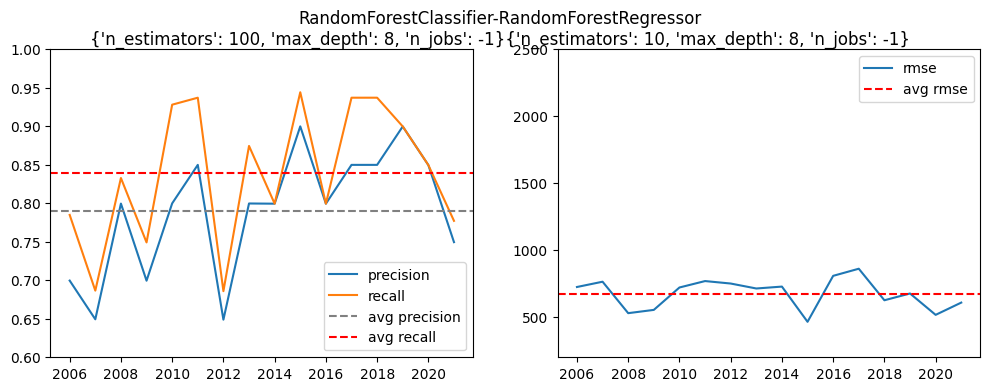

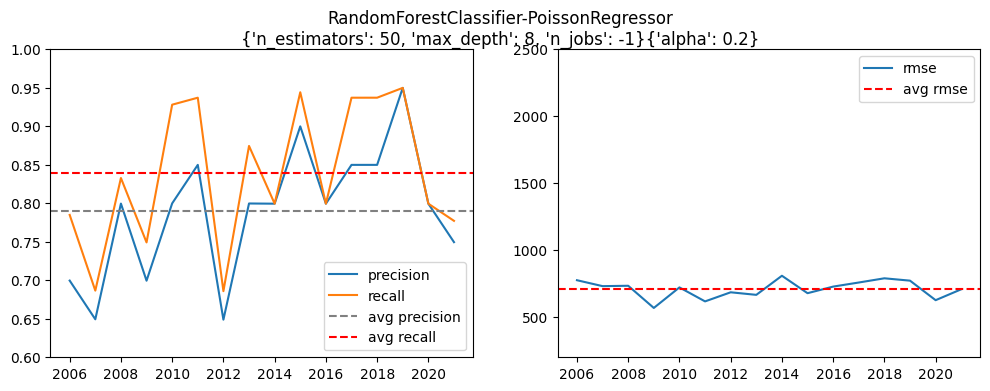

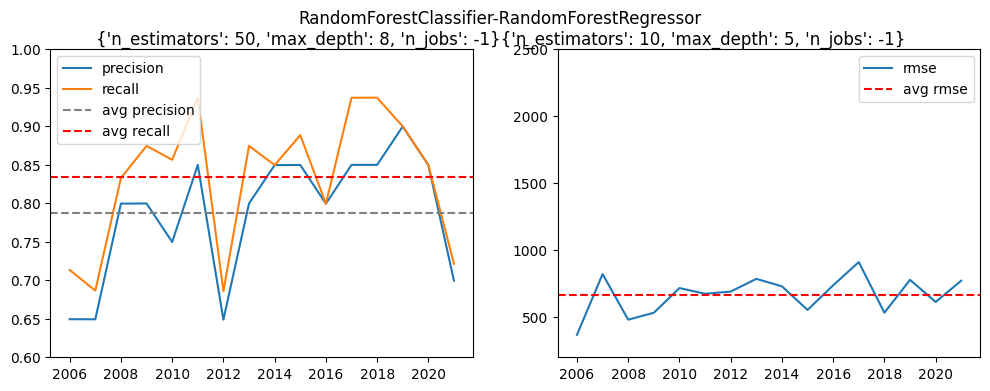

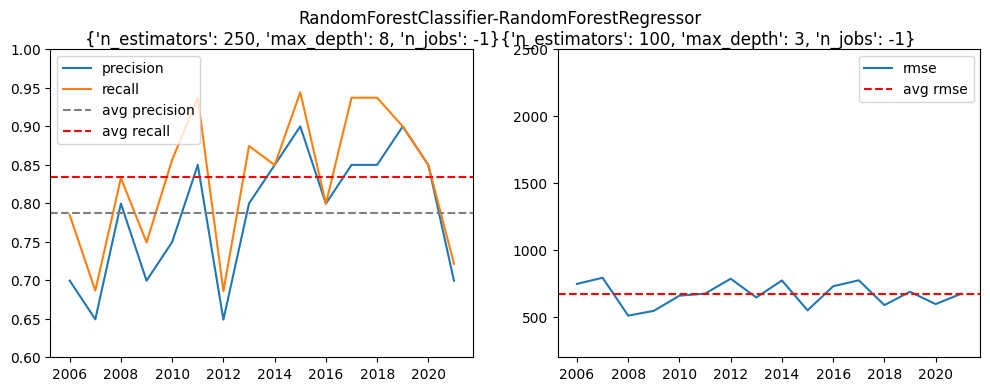

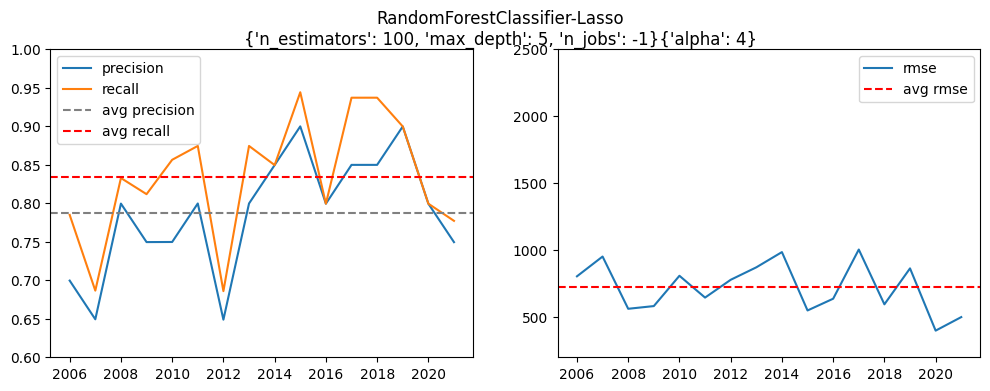

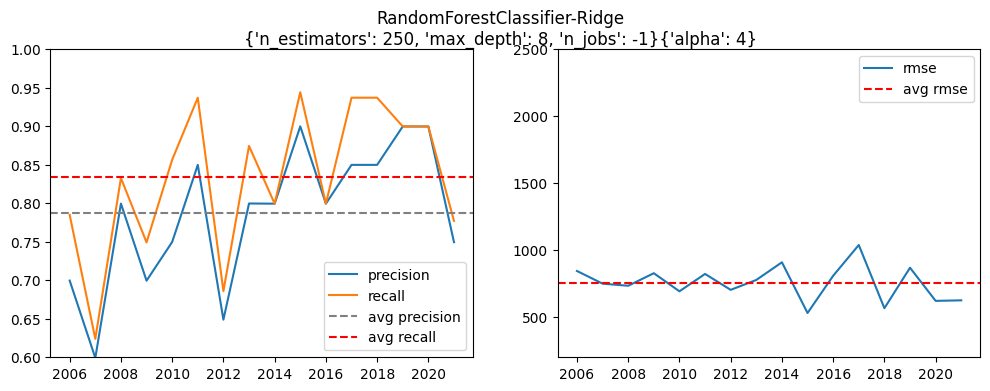

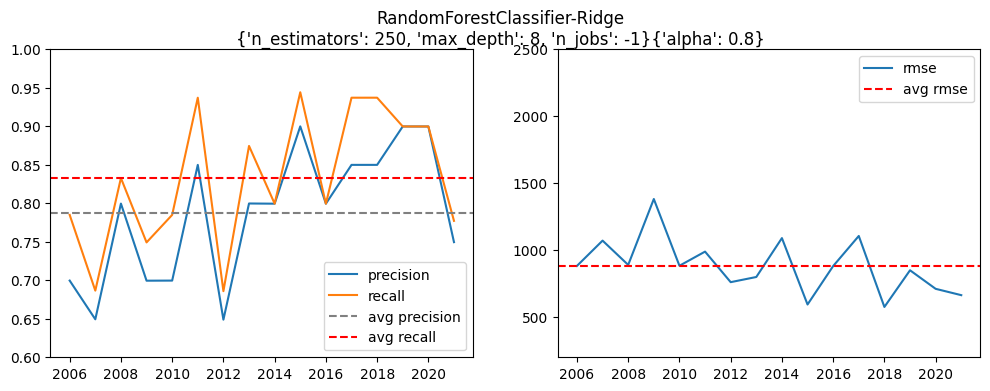

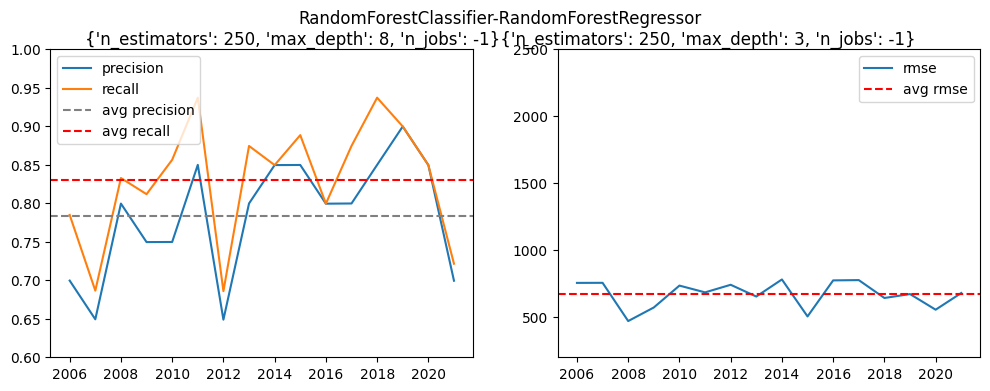

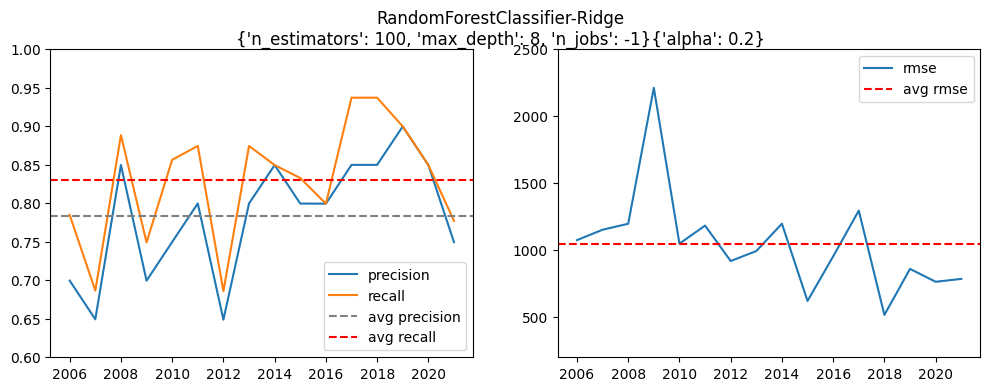

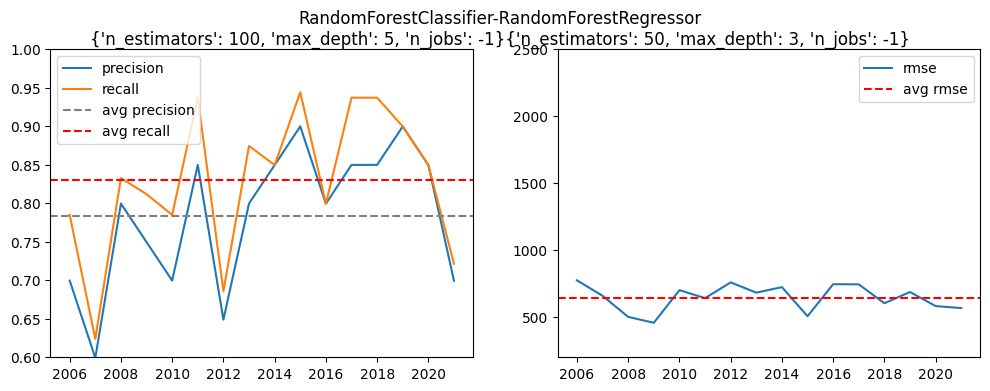

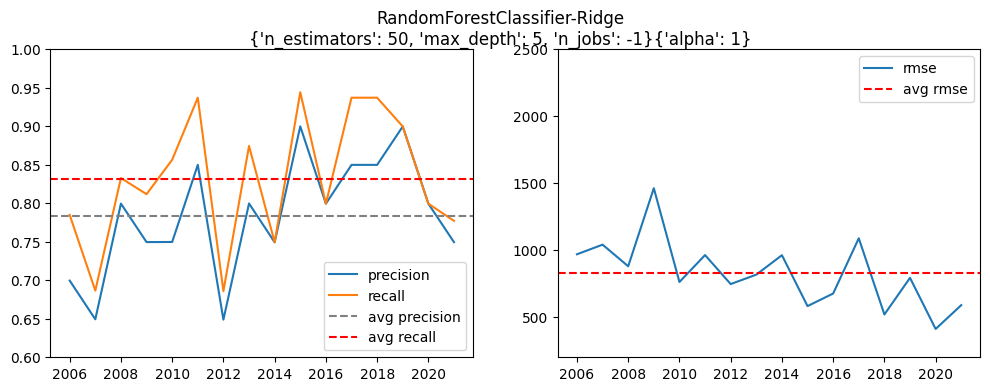

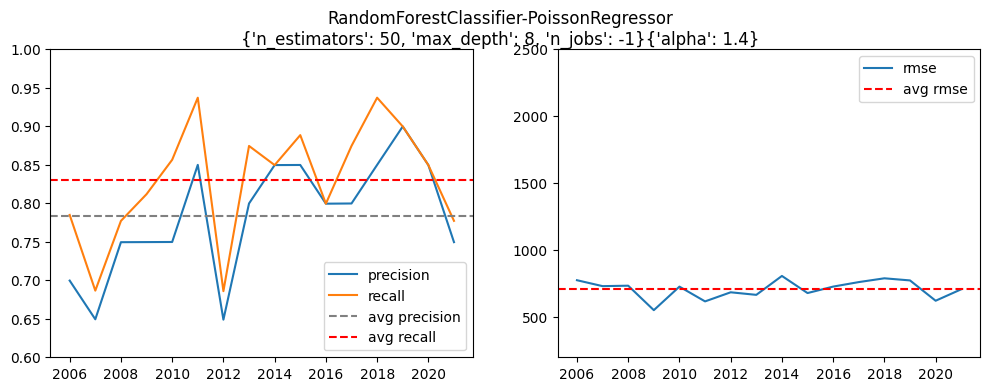

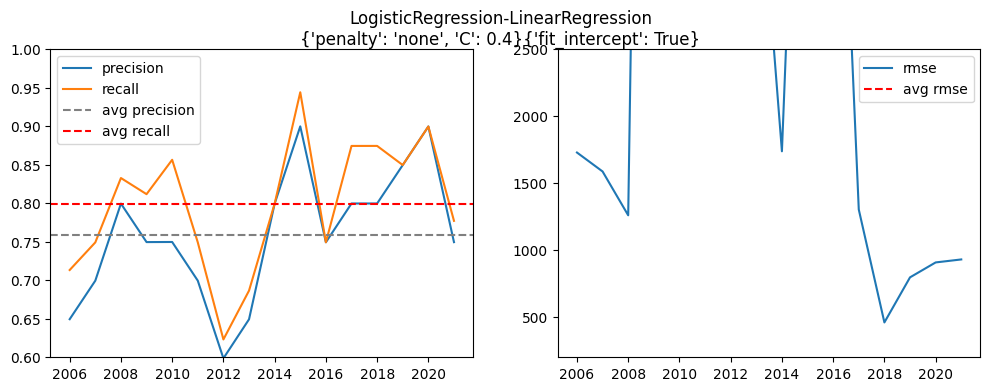

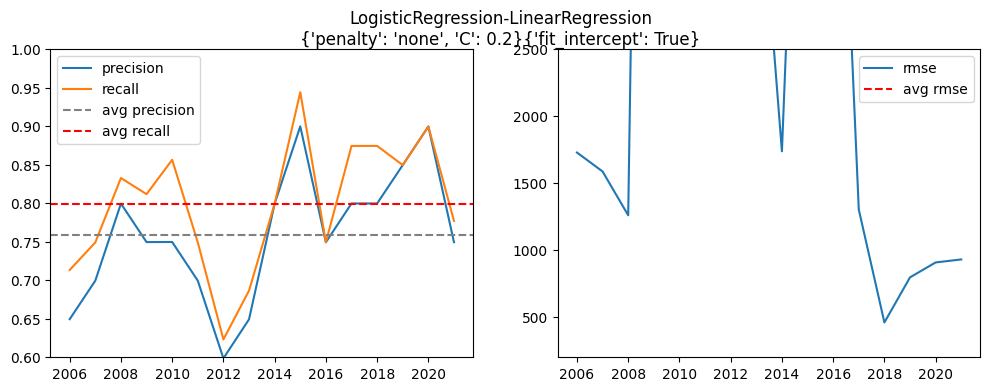

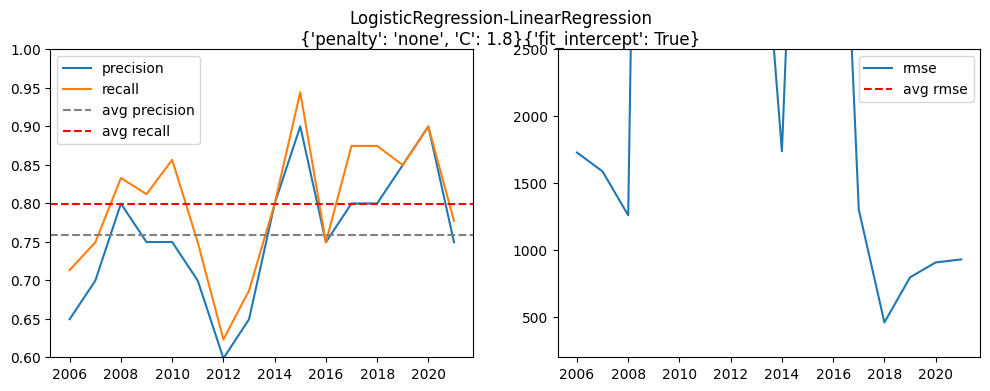

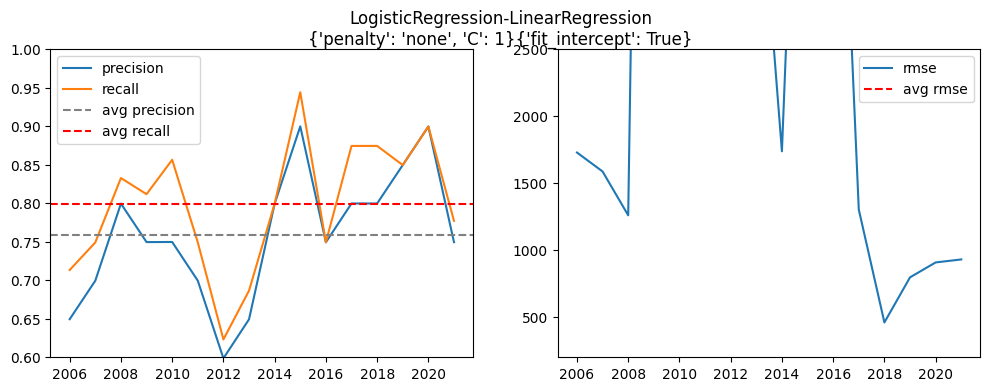

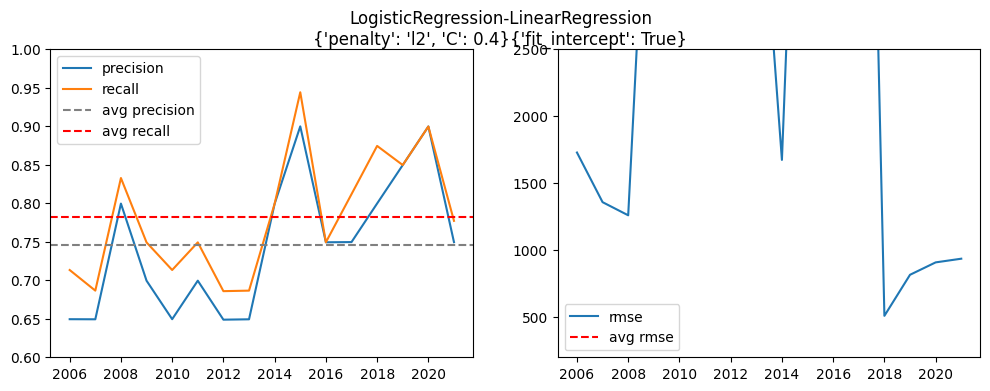

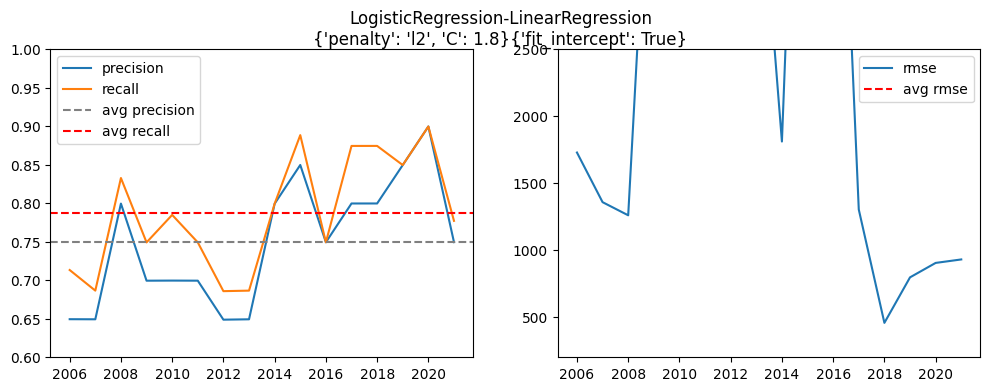

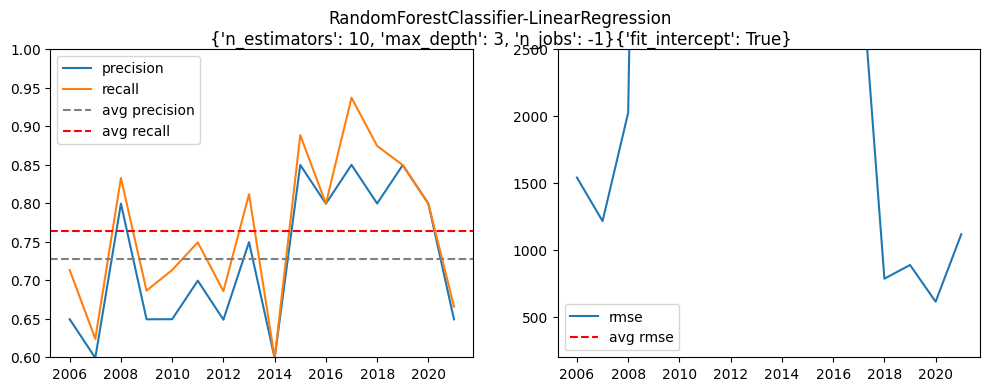

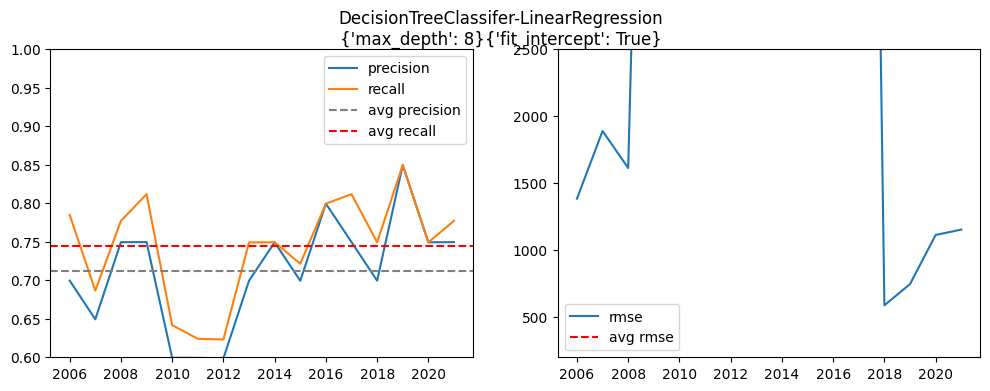

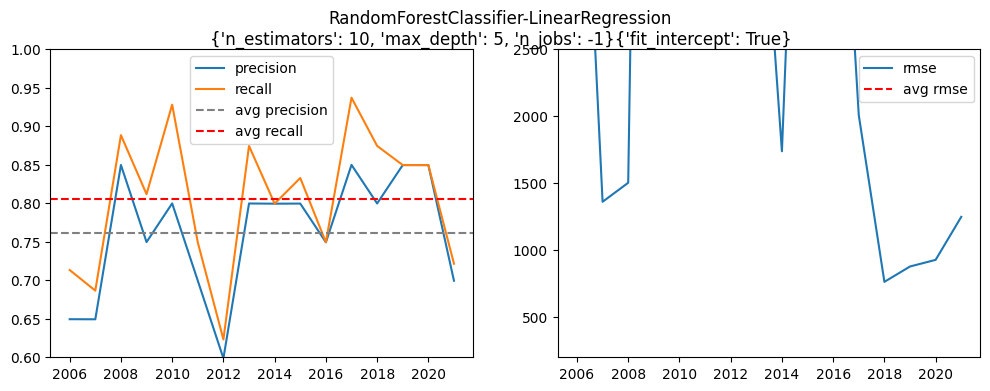

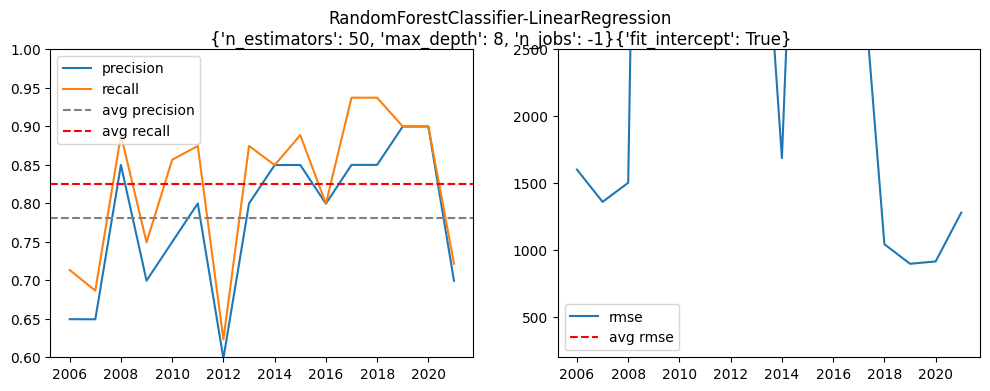

In [51]:
import matplotlib.pyplot as plt

for i in range(len(df)):
    precs = []
    recalls = []
    rmses = []
    years = range(2006, 2022)

    for year in years:
        precs.append(df.iloc[i]['precision_' + str(year)])
        recalls.append(df.iloc[i]['recall_' + str(year)])
        rmses.append(df.iloc[i]['rmse_' + str(year)])

    plt.figure(figsize=(12,4))
    plt.suptitle(f"{df.iloc[i]['clf']}-{df.iloc[i]['reg']}\n{df.iloc[i]['clf_params']}{df.iloc[i]['reg_params']}")
    plt.subplot(121)
    plt.ylim([0.6, 1])
    plt.plot(years, precs, label="precision")
    plt.plot(years, recalls, label="recall")
    plt.axhline(y=df.iloc[i]['precision_avg'], color='grey', linestyle='--', label='avg precision')
    plt.axhline(y=df.iloc[i]['recall_avg'], color='red', linestyle='--', label='avg recall')
    plt.legend()
    plt.subplot(122)
    plt.ylim([200, 2500])
    plt.plot(years, rmses, label='rmse')
    plt.axhline(y=df.iloc[i]['rmse_avg'], color='red', linestyle='--', label='avg rmse')
    plt.legend()
    plt.show()

In [64]:
rmse_df = df.sort_values(by=['rmse_avg'], ascending=False).head(3)
prec_df = df.sort_values(by=['precision_avg'], ascending=False).head(3)
recall_df = df.sort_values(by=['recall_avg'], ascending=False).head(3)

final_df = pd.concat([rmse_df, prec_df, recall_df]).drop_duplicates()
final_df[['model_id', 'clf', 'reg', 'clf_params', 'reg_params', 'precision_avg', 'recall_avg', 'fscore_avg', 'rmse_avg']]

,model_id,clf,reg,clf_params,reg_params,precision_avg,recall_avg,fscore_avg,rmse_avg
8,f4b8c2eb-ce0a-428d-b3cf-6b4cc9738a8a,RandomForestClassifier,Ridge,"{'n_estimators': 100, 'max_depth': 8, 'n_jobs'...",{'alpha': 0.2},0.783966,0.830192,0.804289,1048.323098
6,fe9cfc00-ddaf-453d-90e9-f11fcdbc1835,RandomForestClassifier,Ridge,"{'n_estimators': 250, 'max_depth': 8, 'n_jobs'...",{'alpha': 0.8},0.787099,0.833114,0.807381,883.121218
17,742e34eb-2cdd-4bfb-bc1a-5eca690a405a,RandomForestClassifier,Ridge,"{'n_estimators': 50, 'max_depth': 5, 'n_jobs':...",{'alpha': 1},0.783966,0.832101,0.805147,829.027707
0,a0670834-fd68-4058-8363-dc152b1fe282,RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 8, 'n_jobs'...","{'n_estimators': 10, 'max_depth': 8, 'n_jobs':...",0.790232,0.838926,0.811618,676.022625
1,57df715f-4433-491e-ad3e-5a4cce40bf22,RandomForestClassifier,PoissonRegressor,"{'n_estimators': 50, 'max_depth': 8, 'n_jobs':...",{'alpha': 0.2},0.790232,0.838925,0.811617,710.569709
2,d78b3bff-5991-4b4a-a84e-8373e5ae985b,RandomForestClassifier,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 8, 'n_jobs':...","{'n_estimators': 10, 'max_depth': 5, 'n_jobs':...",0.787100,0.833983,0.807748,668.589047
4,ffada437-ffbb-43df-bb2a-703dc4d12be6,RandomForestClassifier,Lasso,"{'n_estimators': 100, 'max_depth': 5, 'n_jobs'...",{'alpha': 4},0.787099,0.834454,0.807933,721.330936


In [67]:
best_model_clf = df[df['model_id'] == 'a0670834-fd68-4058-8363-dc152b1fe282']['clf_model_object']
best_model_reg = df[df['model_id'] == 'a0670834-fd68-4058-8363-dc152b1fe282']['reg_model_object']

0    [b'\x80', b'\x04', b'\x95', b'\xc1', b'\x07', ...
Name: clf_model_object, dtype: object